In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [39]:
df = pd.read_csv('Social_Network_Ads.csv')

In [40]:
df.head()   

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [41]:
df = df.iloc[:, 2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [42]:
df.sample(5)

,Age,EstimatedSalary,Purchased
193,19,70000,0
301,48,74000,1
396,51,23000,1
289,37,78000,1
334,57,60000,1


In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased',axis= 1),df['Purchased'], test_size=0.3, random_state=0)

In [44]:
x_train.shape ,x_test.shape

((280, 2), (120, 2))

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

In [46]:
sc.mean_

array([3.78642857e+01, 6.98071429e+04])

In [47]:
x_train_scaled[:5]

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654]])

In [53]:

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [54]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


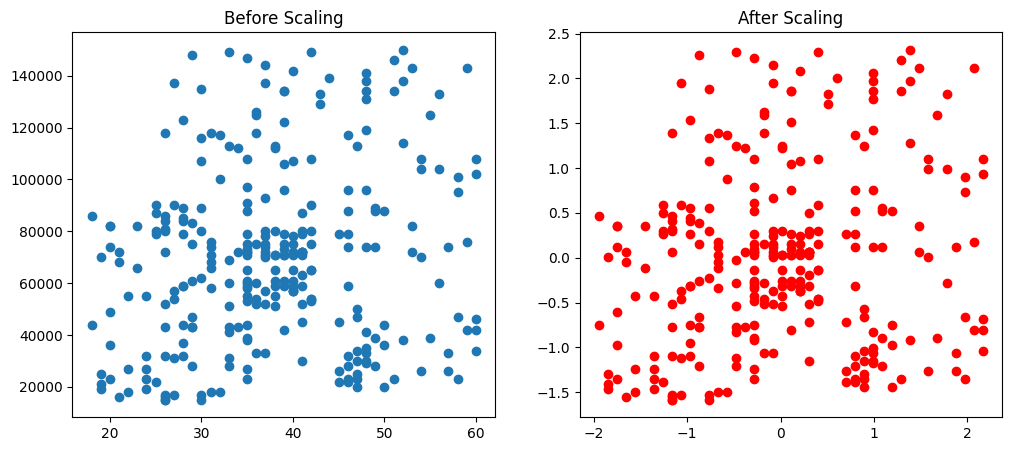

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

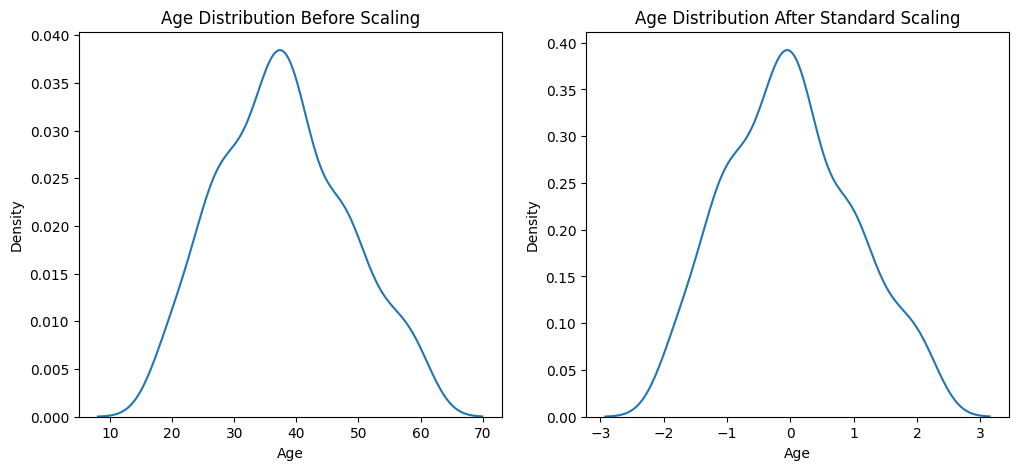

In [56]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

WHY sclaing is important:?

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [ ]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [64]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [61]:
from sklearn.metrics import accuracy_score

In [65]:

print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667
